# Fashion-MNIST Classifier Using Convolution Neural Network Transfer Learning

In this notebook we attempt to classify images from the Fashion-MNIST data set using convolutional neural networks. We perform close to state of the art performance with validation accuracy in the 93%-94% range.

The structure of the model has been inspired by a [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/keras/classification) and a [model](https://github.com/mjbhobe/dl-tensorflow-keras/blob/master/Fashion%20-%20CNN%20-%20Keras.ipynb) by Manish Bhobe.

### Table of Contents

- [0. Loading Packages and Data](#0.-Loading-Packages-and-Data)
- [1. Data Preprocessing](#1.-Data-Preprocessing)
- [2. Model Construction](#2.-Model-Construction)
- [3. Plot Results of Tree Classifier](#3.-Plot-Results-of-Tree-Classifier)
- [4. CatBoost Classifier](#4.-CatBoost-Classifier)


## 0. Loading Packages and Data

The convolutional network was built using the Keras API, now officially implemented in TensorFlow.

In [1]:
from tensorflow.keras import datasets

We will also need Numpy for some data processing and Matplotlib for graphs.

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier, Pool, cv

import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
# add a dimension for convnet compatibility
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 1. Data Preprocessing

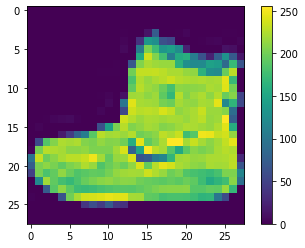

In [12]:
plt.figure()
plt.imshow(train_images[0, :, :, 0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

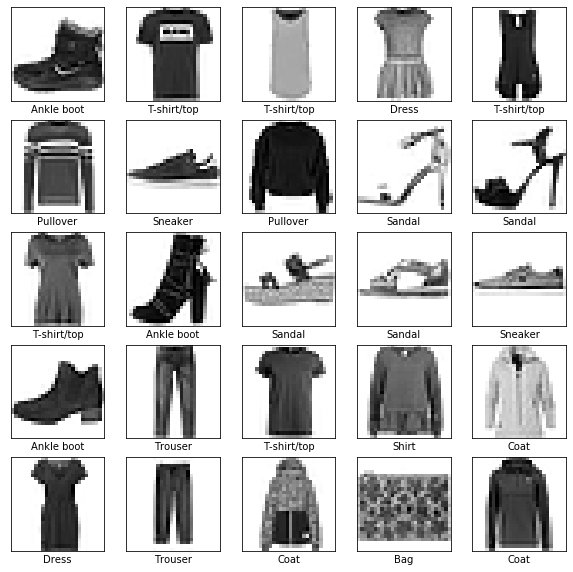

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,:,:,0], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 2. Model Construction

In [15]:
df_train = pd.read_csv('Models/fashion_train_features.csv')
df_test = pd.read_csv('Models/fashion_test_features.csv')

In [16]:
df_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,label
0,0,0.170151,0.000000,0.000000,0.000000,0.022848,0.000000,0.000000,0.000000,1.674970,...,1.896253,1.266857,0.831139,0.0,0.000000,0.000000,0.000000,0.177850,1.771952,9
1,1,1.955523,0.000000,0.000000,0.000000,0.233189,2.207638,0.000000,0.000000,0.026495,...,0.001007,0.074969,0.005109,0.0,0.811388,1.970696,2.550843,1.503872,0.000000,0
2,2,1.698126,0.000000,0.000000,0.000000,0.000000,1.678955,0.000000,0.000000,0.112561,...,0.000000,0.138917,0.131430,0.0,1.092099,1.907873,1.969790,1.320426,0.084397,0
3,3,0.246182,0.000000,0.000000,0.000000,1.802147,2.122767,0.000000,0.029477,0.484735,...,0.206671,0.000000,0.015219,0.0,0.393183,1.801248,2.140509,0.175262,0.059735,3
4,4,1.014046,0.219493,0.222449,0.075574,0.473106,1.519135,0.223585,0.072559,0.229273,...,0.018439,0.116573,0.157623,0.0,0.855282,1.494034,1.681175,0.796316,0.188880,0


In [21]:
X = df_train.loc[:, df_train.columns != 'label']
y = df_train.label

X_test = df_test.loc[:, df_test.columns != 'label']
y_test = df_test.label

In [46]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)

In [47]:
test_predict = clf.predict(X_test)

In [48]:
test_predict

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [49]:
accuracy_score(y_test, test_predict)

0.9315

## 3. Plot Results of Tree Classifier

In [50]:
def plot_image(i, prediction, true_label, img):
    """
    Shows the image with prediction and predicted label with calculated
    probability.
    """
    prediction, true_label, img = prediction, true_label[i], \
                                         img[i,:,:,0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = prediction
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

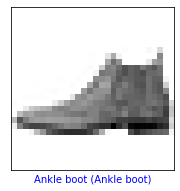

In [51]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, test_predict[i], y_test, test_images)

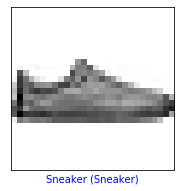

In [52]:
i = 12
plt.figure(figsize=(6,3))
plot_image(i, test_predict[i], y_test, test_images)

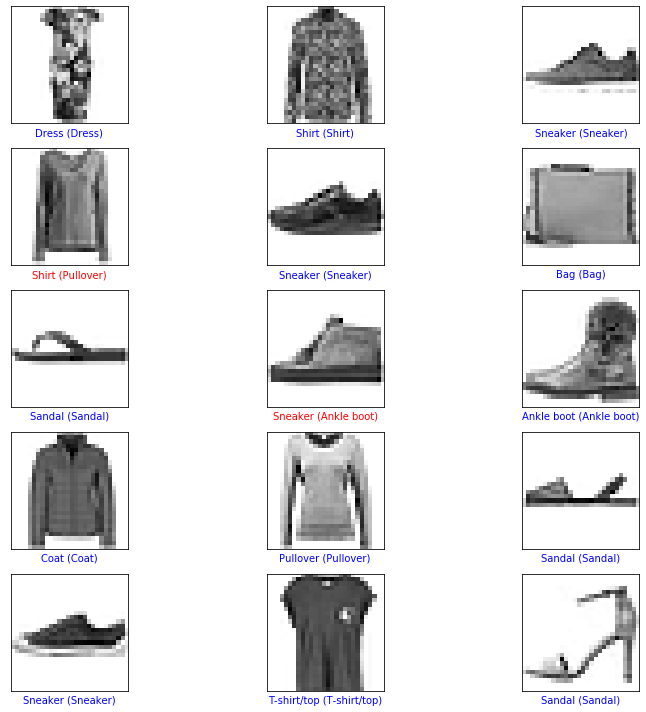

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
start_image = 100 # Set to 0 for first images
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(start_image + i, test_predict[start_image + i], test_labels, test_images)
plt.tight_layout()
plt.show()

# 4. CatBoost Classifier

In [66]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=0,
    logging_level='Silent'
)

In [67]:
def fitModel(model, X_train, y_train, X_val, y_val, use_cv=False, n_folds=3):
    """
    Function fitting the model.
    The `use_cv` option, if set to `True` will also perform a n-fold cross validation analysis.
    the `nfolds` parameter sets the number of folds in the cross validation.
    """
    
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        #logging_level='Verbose',
        plot=True
    )
    
    if use_cv:
        cv_params = model.get_params()
        cv_data = cv(
            Pool(X, y),
            cv_params,
            plot=True
        )

In [68]:
fitModel(model, X, y, X_test, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [84]:
predictions = model.predict(X_test).astype(int).flatten()

In [85]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [87]:
accuracy_score(y_test, predictions)

0.9385

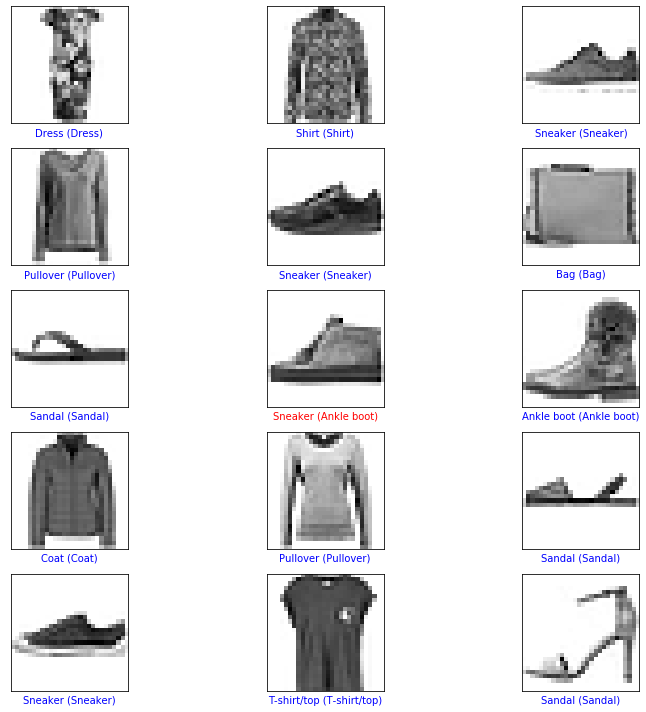

In [86]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
start_image = 100 # Set to 0 for first images
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(start_image + i, predictions[start_image + i], test_labels, test_images)
plt.tight_layout()
plt.show()